# Backtesting with [BT](https://pmorissette.github.io/bt/#what-is-bt)

In [1]:
import bt
%matplotlib inline

## Fixed Weights Strategy Comparison - Traditional 60/40 portfolio vs 60/39/1 (1% allocation in BTC) - Annual Rebalancing

In [50]:
# Get prices from Yahoo Finance
data = bt.get('spy,agg,btc-usd', start='2014-01-01').ffill()
data

,spy,agg,btcusd
Date,,,
2014-09-17,173.911087,90.539490,457.334015
2014-09-18,174.838089,90.547859,424.440002
2014-09-19,174.680527,90.698074,394.795990
2014-09-22,173.331467,90.823257,402.152008
2014-09-23,172.339264,90.906700,435.790985
...,...,...,...
2022-04-22,426.040009,102.940002,39740.320312
2022-04-25,428.510010,103.629997,40458.308594
2022-04-26,416.100006,103.949997,38117.460938


In [51]:
# Create the BT strategy traditional 60/40 portfolio with annual rebalancing
# For the list of available strategies see BT documentation
alt_asset = bt.Strategy('alt_asset', [bt.algos.RunYearly(),
                       bt.algos.RunOnDate('2014-09-17'),
                       bt.algos.SelectAll(),
                       bt.algos.WeighSpecified(spy=0.6,agg=0.39,btcusd=0.01),
                       bt.algos.Rebalance()])

In [52]:
# Create the BT strategy with annual rebalancing and adding 1% BTC to traditional 60/40 portfolio
sixty_forty = bt.Strategy('sixty_forty', [bt.algos.RunYearly(),
                       bt.algos.RunOnDate('2014-09-17'),
                       bt.algos.SelectThese('spy','agg'),
                       bt.algos.WeighSpecified(spy=0.6,agg=0.4),
                       bt.algos.Rebalance()])

In [53]:
# Create a backtest and run it
test = bt.Backtest(alt_asset, data)
test2 = bt.Backtest(sixty_forty, data)
res = bt.run(test,test2)

<AxesSubplot:title={'center':'alt_asset vs sixty_forty'}>

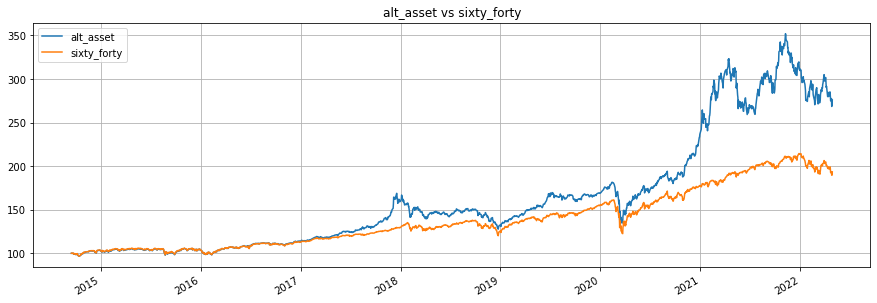

In [54]:
# Plot strategy performance over time 
res.plot(grid=True, title='alt_asset vs sixty_forty')


In [55]:
# Display lookback returns
res.display_lookback_returns()

,alt_asset,sixty_forty
mtd,-7.33%,-4.80%
3m,-1.29%,-3.91%
6m,-17.30%,-6.75%
ytd,-10.93%,-9.47%
1y,-9.82%,0.78%
3y,22.13%,10.97%
5y,18.13%,10.35%
10y,nan%,nan%
incep,14.25%,9.04%


In [56]:
# Display monthly returns from backtest - alt_asset
res.display_monthly_returns(backtest='alt_asset')

  Year    Jan    Feb     Mar    Apr     May    Jun    Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  ------  -----  ------  -----  -----  -----  -----  -----  -----  -----  ------
  2014   0      0       0      0       0      0      0      0     -0.76   1.72   1.99  -0.21    2.73
  2015  -1.18   3.03   -0.83   0.45    0.61  -1.6    1.75  -3.96  -1.19   5.24   0.17  -1.02    1.16
  2016  -2.63   0.43    4.26   0.41    1.18   1.23   2.36  -0.16   0.09  -1.19   1.33   1.75    9.26
  2017   1.2    3.06   -0.13   1.38    2.82   0.72   2.05   3.52   0.16   5.15   7.49   7.08   40.07
  2018  -3.12  -2.17   -5.9    3.1    -0.9   -1.47   4.57   1.06  -0.35  -4.98  -2.01  -5.46  -16.78
  2019   4.79   2.63    2.16   4.35    0.96   9.68  -1.98  -0.85  -0.7    2.57   0.36   1.09   27.49
  2020   3.22  -5.26  -10.47  11.14    4.02   0.88   6.59   4.36  -3.3    1.46  13.49  11.37   40.85
  2021   4     11.33   11.53   1.64  -14.52   0.84   7.15   5.11  -4.87  17.02  -3.59  -4.7

In [57]:
# Display monthly returns from backtest - sixty_forty
res.display_monthly_returns(backtest='sixty_forty')

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2014   0      0      0      0      0      0      0      0     -0.61   1.83   1.91  -0.09   3.04
  2015  -0.97   2.95  -0.8    0.46   0.6   -1.66   1.71  -3.84  -1.19   5.02   0.07  -1.13   0.93
  2016  -2.52   0.32   4.31   0.34   1.03   0.98   2.41  -0.01   0.02  -1.37   1.22   1.36   8.2
  2017   1.2    2.71   0.06   0.96   1.15   0.4    1.44   0.52   1.09   1.56   1.95   0.96  14.9
  2018   3.35  -2.79  -1.62   0.03   1.84   0.42   2.48   2.35   0.21  -4.95   1.5   -5.31  -2.91
  2019   5.53   2.12   1.91   2.68  -3.74   4.99   1.08  -0.24   1.1    1.56   2.45   1.98  23.28
  2020   0.59  -4.96  -8.51   8.72   3.38   1.41   4.4    4.5   -2.64  -1.89   7.84   2.64  15
  2021  -0.94   1.54   2.95   4.07   0.54   1.88   2.1    2.17  -3.73   5.23  -0.54   3.41  19.98
  2022  -4.5   -2.52   2.

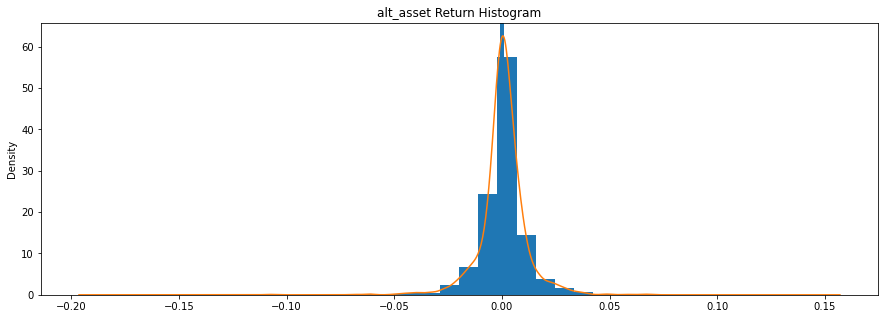

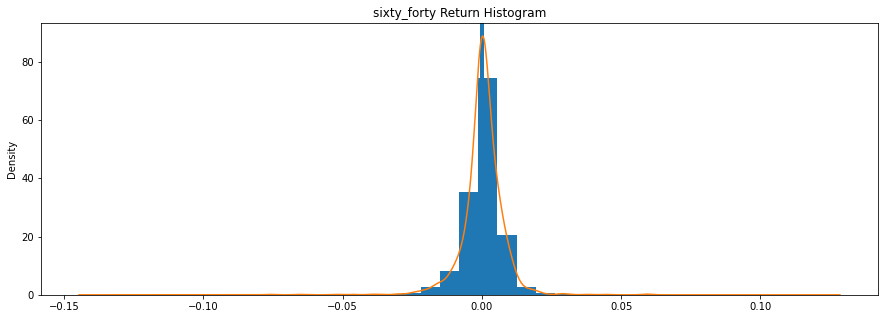

In [58]:
# Display strategy histogram
res.plot_histogram('alt_asset')
res.plot_histogram('sixty_forty')

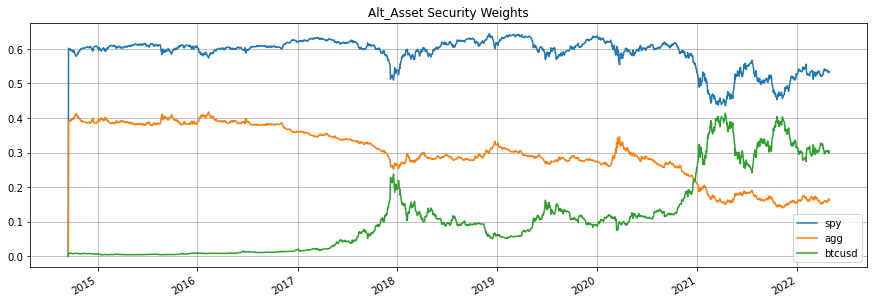

In [59]:
# Plot the security weights over time - alt_asset
res.plot_security_weights(grid=True, title='Alt_Asset Security Weights')

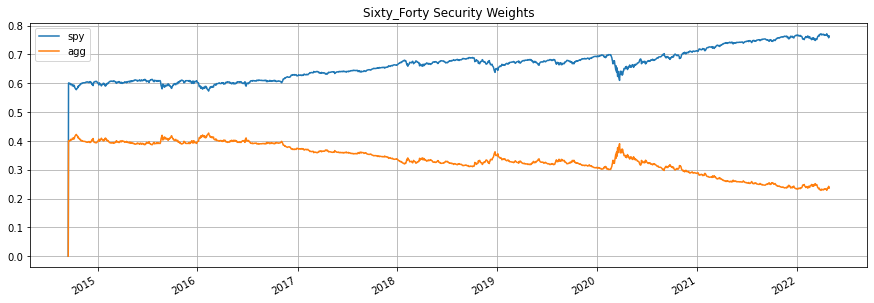

In [60]:
# Plot the security weights over time - sixty_forty
res2 = bt.run(test2)
res2.plot_security_weights(grid=True, title='Sixty_Forty Security Weights')

In [61]:
# Security weights over time - alt_asset
res.get_security_weights().tail()

,spy,agg,btcusd
2022-04-22,0.534837,0.161329,0.303671
2022-04-25,0.532787,0.160855,0.306197
2022-04-26,0.534818,0.166797,0.298217
2022-04-27,0.531211,0.164540,0.304083
2022-04-28,0.535271,0.161651,0.302915


In [62]:
# Security weights over time - sixty_forty
res2.get_security_weights().tail()

,spy,agg
2022-04-22,0.763704,0.236247
2022-04-25,0.763542,0.236410
2022-04-26,0.757629,0.242321
2022-04-27,0.758886,0.241065
2022-04-28,0.763491,0.236461


In [63]:
# Print strategy stats (set risk-free rate)
res.set_riskfree_rate(0.01)
res.display()

Stat                 alt_asset    sixty_forty
-------------------  -----------  -------------
Start                2014-09-16   2014-09-16
End                  2022-04-28   2022-04-28
Risk-free rate       1.00%        1.00%

Total Return         175.74%      93.32%
Daily Sharpe         0.81         0.71
Daily Sortino        1.24         1.06
CAGR                 14.25%       9.04%
Max Drawdown         -25.65%      -23.98%
Calmar Ratio         0.56         0.38

MTD                  -7.33%       -4.80%
3m                   -1.29%       -3.91%
6m                   -17.30%      -6.75%
YTD                  -10.93%      -9.47%
1Y                   -9.82%       0.78%
3Y (ann.)            22.13%       10.97%
5Y (ann.)            18.13%       10.35%
10Y (ann.)           -            -
Since Incep. (ann.)  14.25%       9.04%

Daily Sharpe         0.81         0.71
Daily Sortino        1.24         1.06
Daily Mean (ann.)    14.81%       9.36%
Daily Vol (ann.)     17.16%       11.79%
Daily Skew  